In [ ]:
# intensity Adjustment = untuk melakukan pemetaan linear terhadap nilai intensitas pada 
# histogram awal menjadi nilai intensitas pada histogram yang baru

In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# Open the image. 
img = mpimg.imread('C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel A/A1 (1).jpg') 

plt.axis('off')
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A1 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A10 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A11 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A12 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A13 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/A14 (1)

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B44 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B44 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B45 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B45 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B45 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B46 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B46 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B46 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B47 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B48 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B49 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/B49 

C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C39 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C4 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C4 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C4 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C40 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C40 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C40 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C41 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C41 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C41 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C42 (3).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (1).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (2).jpg
C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Kopi Done/C43 (3)

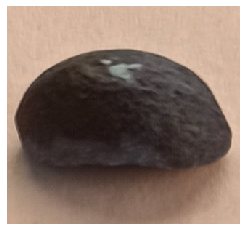

In [379]:
import numpy as np 
import cv2 
import os
import re
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# -------------------- Load Dataset ------------------------
 
dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi"

for folder in ["Sampel A","Sampel B","Sampel C"]:
    for image_file in os.listdir(os.path.join(dataset_dir, folder)):
        img = cv2.imread("%s/%s/%s" % (dataset_dir, folder, image_file)) 
  
        # Trying 4 gamma values. 
        for gamma in [1.2]: 

            # Apply gamma correction. 
            gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
            print("%s/%s/%s" % (dataset_dir, "Sampel Kopi Done", image_file))
            # Save edited images. 
            cv2.imwrite(("%s/%s/%s" % (dataset_dir, "Sampel Intensity", image_file)), gamma_corrected)

        plt.axis("off")
        plt.imshow(img)
        plt.show

In [ ]:
# GrayScale = untuk mengubah citra warna menjadi citra keabuan

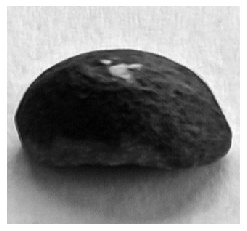

In [373]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as img
# Reading color image

dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Intensity"
target_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Greyscale"

for image_file in os.listdir(dataset_dir):
    #for image_file in os.listdir(os.path.join(dataset_dir, folder)):
    img = cv2.imread("%s/%s" % (dataset_dir, image_file))

    # Converting color image to grayscale image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(("%s/%s" % (target_dir, image_file)),gray)
    # Showing the converted image

plt.axis('off')
plt.imshow(gray, cmap='gray')
plt.show()

In [ ]:
#Thresholding = untuk memisahkan antara objek dengan background 
# dalam suatu citra berdasarkan pada perbedaan tingkat kecerahannya atau gelap terang nya

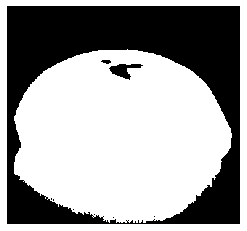

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Greyscale"
target_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Thresholding"

for image_file in os.listdir(dataset_dir):
    
    img = cv2.imread("%s/%s" % (dataset_dir, image_file),0)
    # convert to binary by thresholding
    ret, binary_map = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # do connected components processing
    nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_map, None, None, None, 8, cv2.CV_32S)
    #get CC_STAT_AREA component as stats[label, COLUMN] 
    areas = stats[1:,cv2.CC_STAT_AREA]
    result = np.zeros((labels.shape), np.uint8)
    for i in range(0, nlabels - 1):
        if areas[i] >= 100:   #keep
            result[labels == i + 1] = 255

    cv2.imwrite(("%s/%s" % (target_dir, image_file)) ,result)
    
plt.imshow(result,'gray')
plt.axis('off')
plt.show()

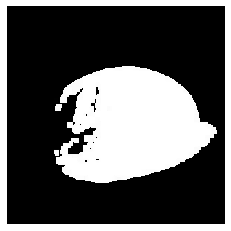

In [370]:
#### import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Thresholding/A1 (1).jpg",0)

kernel = np.ones((6,6),np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        
plt.imshow(opening,'gray')
plt.axis("off")
plt.show()
        

In [ ]:
#Segmentasi

(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 ...
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]
 ...
 [3 0 3 ..

 [1 0 1 ... 1 0 1]]
(30000, 3)
[[0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]]
(30000, 3)
[[2 0 3 ... 2 0 3]
 [2 0 3 ... 2 0 3]
 [2 0 3 ... 2 0 3]
 ...
 [2 0 3 ... 2 0 3]
 [2 0 3 ... 2 0 3]
 [2 0 3 ... 2 0 3]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 

 [2 0 1 ... 2 0 1]]
(30000, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(30000, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(30000, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 ...
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]]
(30000, 3)
[[0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 0 0 1]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 

[[2 0 1 ... 2 0 1]
 [2 0 1 ... 2 0 1]
 [2 0 1 ... 2 0 1]
 ...
 [2 0 1 ... 2 0 1]
 [2 0 1 ... 2 0 1]
 [2 0 1 ... 2 0 1]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 ...
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]]
(30000, 3)
[[1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 ...
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]]
(30000, 3)
[[2 0 3 ... 2 0 3]
 [2 0 3 ... 2 0 3]
 [2 0 3 ... 2 0 3]
 ...
 [2 0 3 ... 2 0 3]
 [2 0 3 ... 2 0 3]
 [2 0 3 ... 2 0 3]]
(30000, 3)
[[4 0 5 ... 4 0 5]
 [4 0 5 ... 4 0 5]
 [4 0 5 ... 4 0 5]
 ...
 [4 0 5 ... 4 0 5]
 [4 0 5 ... 4 0 5]
 [4 0 5 ... 4 0 5]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [

(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 ...
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]]
(30000, 3)
[[1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 ...
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]
 [1 0 2 ... 1 0 2]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ..

(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[4 0 5 ... 4 0 5]
 [4 0 5 ... 4 0 5]
 [4 0 5 ... 4 0 5]
 ...
 [4 0 5 ... 4 0 5]
 [4 0 5 ... 4 0 5]
 [4 0 5 ... 4 0 5]]
(30000, 3)
[[3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]
 ...
 [3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ..

 [1 0 1 ... 1 0 1]]
(30000, 3)
[[2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 ...
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]
 [2 0 2 ... 2 0 2]]
(30000, 3)
[[3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]
 ...
 [3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]
 [3 0 3 ... 3 0 3]]
(30000, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(30000, 3)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]]
(30000, 3)
[[1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 ...
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 1 0 1]]
(30000, 3)
[[1 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 1 

(-0.5, 320.5, 299.5, -0.5)

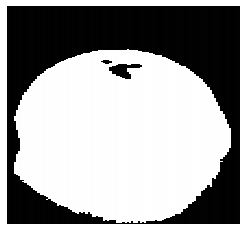

In [45]:
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Thresholding"
target_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Segmentasi"

for image_file in os.listdir(dataset_dir):
    
    img = cv2.imread("%s/%s" % (dataset_dir, image_file),0)

    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    print(pixel_values.shape)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    k=2
    _, labels, (centers) = cv2.kmeans(pixel_values,
                                    k,
                                    None,
                                    criteria,
                                    10,
                                    cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    labels = labels.flatten()

    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img.shape)
    print(segmented_image)

    cv2.imwrite(("%s/%s" % (target_dir, image_file)) ,segmented_image)
    
plt.imshow(segmented_image, 'gray')
plt.show
plt.axis("off")

In [ ]:
#Histogram = untuk meratakan persebaran nilai intensitas piksel suatu citra

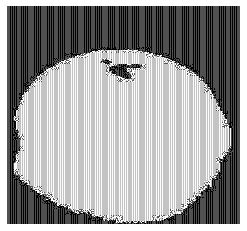

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as img

dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Segmentasi"
target_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Histogram"

for image_file in os.listdir(dataset_dir):

    img = cv2.imread("%s/%s" % (dataset_dir, image_file),0)

    equ = cv2.equalizeHist(img)

    # stacking images side-by-side
    res = np.hstack((img, equ))
    cv2.imwrite(("%s/%s" % (target_dir, image_file)),equ)
# show image input vs output
plt.axis('off')
plt.imshow(equ, cmap='gray')
plt.show()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Thresholding/A1 (1).jpg')
plt.hist(img.ravel(), bins=255, range=(0.0, 1.0), fc='k', ec='k') #calculating histogram

(array([185679.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

In [ ]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate


cat = plt.imread('cat.jpeg')


rotcat = rotate(cat, angle=8, reshape=True) ## rotating creates some black edges
height, width, _ = rotcat.shape

bgcopy = bg.copy() ## create a copy of the background; paste on copy

x, y = 40, 50 
bgcopy[x:x+height, y:y+width] = rotcat
plt.imsave('cat-on-bg-mask.jpg', bgcopy)

In [ ]:
#Ekstrasi Fitur

In [36]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
import pandas as pd

img = io.imread('C:/Users/epen/SKRIPSI/a-Histogram.png')

gray = color.rgb2gray(img)
image = img_as_ubyte(gray)

bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
inds = np.digitize(image, bins)

max_value = inds.max()+1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)

# GLCM properties
def contrast_feature(matrix_coocurrence):
	contrast = greycoprops(matrix_coocurrence, 'contrast')
	return "Contrast = ", contrast

def dissimilarity_feature(matrix_coocurrence):
	dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')	
	return "Dissimilarity = ", dissimilarity

def homogeneity_feature(matrix_coocurrence):
	homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
	return "Homogeneity = ", homogeneity

def energy_feature(matrix_coocurrence):
	energy = greycoprops(matrix_coocurrence, 'energy')
	return "Energy = ", energy

def correlation_feature(matrix_coocurrence):
	correlation = greycoprops(matrix_coocurrence, 'correlation')
	return "Correlation = ", correlation

def asm_feature(matrix_coocurrence):
	asm = greycoprops(matrix_coocurrence, 'ASM')
	return "ASM = ", asm

print(contrast_feature(matrix_coocurrence))
print(dissimilarity_feature(matrix_coocurrence))
print(homogeneity_feature(matrix_coocurrence))
print(energy_feature(matrix_coocurrence))
print(correlation_feature(matrix_coocurrence))
print(asm_feature(matrix_coocurrence))

('Contrast = ', array([[5.82207358, 8.15326971, 5.77538451, 7.74605868]]))
('Dissimilarity = ', array([[0.3638796 , 0.50957936, 0.36096153, 0.48412867]]))
('Homogeneity = ', array([[0.97734602, 0.96827522, 0.97752769, 0.96985969]]))
('Energy = ', array([[0.82086008, 0.81501641, 0.82100627, 0.81593114]]))
('Correlation = ', array([[0.92518024, 0.89554851, 0.92576414, 0.90076529]]))
('ASM = ', array([[0.67381127, 0.66425175, 0.6740513 , 0.66574362]]))


In [115]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
import pandas as pd

dataset_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Greyscale"
target_dir = "C:/Users/epen/SKRIPSI/Sampel Kopi/Sampel Thresholding"

for image_file in os.listdir(dataset_dir):

    img = io.imread("%s/%s" % (dataset_dir, image_file),0)

    gray = color.rgb2gray(img)
    image = img_as_ubyte(gray)

    bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
    inds = np.digitize(image, bins)

    max_value = inds.max()+1
    matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)

# GLCM properties
def contrast_feature(matrix_coocurrence):
	contrast = greycoprops(matrix_coocurrence, 'contrast')
	return "Contrast = ", contrast

def dissimilarity_feature(matrix_coocurrence):
	dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')	
	return "Dissimilarity = ", dissimilarity

def homogeneity_feature(matrix_coocurrence):
	homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
	return "Homogeneity = ", homogeneity

def energy_feature(matrix_coocurrence):
	energy = greycoprops(matrix_coocurrence, 'energy')
	return "Energy = ", energy

def correlation_feature(matrix_coocurrence):
	correlation = greycoprops(matrix_coocurrence, 'correlation')
	return "Correlation = ", correlation

def asm_feature(matrix_coocurrence):
	asm = greycoprops(matrix_coocurrence, 'ASM')
	return "ASM = ", asm

print(contrast_feature(matrix_coocurrence))
print(dissimilarity_feature(matrix_coocurrence))
print(homogeneity_feature(matrix_coocurrence))
print(energy_feature(matrix_coocurrence))
print(correlation_feature(matrix_coocurrence))
print(asm_feature(matrix_coocurrence))

('Contrast = ', array([[0.15823958, 0.24138796, 0.17070401, 0.25230978]]))
('Dissimilarity = ', array([[0.13344792, 0.17581522, 0.1368216 , 0.18521112]]))
('Homogeneity = ', array([[0.93571109, 0.91798699, 0.93492008, 0.91360329]]))
('Energy = ', array([[0.35112608, 0.34373284, 0.35156051, 0.34168396]]))
('Correlation = ', array([[0.99433429, 0.99135763, 0.99389689, 0.99097282]]))
('ASM = ', array([[0.12328952, 0.11815227, 0.12359479, 0.11674793]]))
